### Study Mixing_rules data of ARM data 

In [1]:
import numpy as np
from pathlib import Path
from lib.ARM_IO_scripts import load_ARM_data

In [3]:
path = Path('../Network_model_data/');

vel_old = []; vel_new = [];
net_old = []; net_new = []
q_old   = [];   q_new = [];
dia_old = []; dia_new = [];
for i in range(10,22):
    net_old = {}; net_new = {};
    
    net_old = load_ARM_data(path, prefix='_old_'+ str(i), file_type='.csv')
    dia_old = net_old['diameter']
    q_old = net_old['flow_rate']
    vel_old.extend(4*abs(q_old)/(np.pi * pow(dia_old,2))) 

    net_new = load_ARM_data(path, prefix='_new_'+ str(i), file_type='.csv')                
    dia_new = net_new['diameter']
    q_new = net_new['flow_rate']
    vel_new.extend(4*abs(q_new)/(np.pi * pow(dia_new,2)))     

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

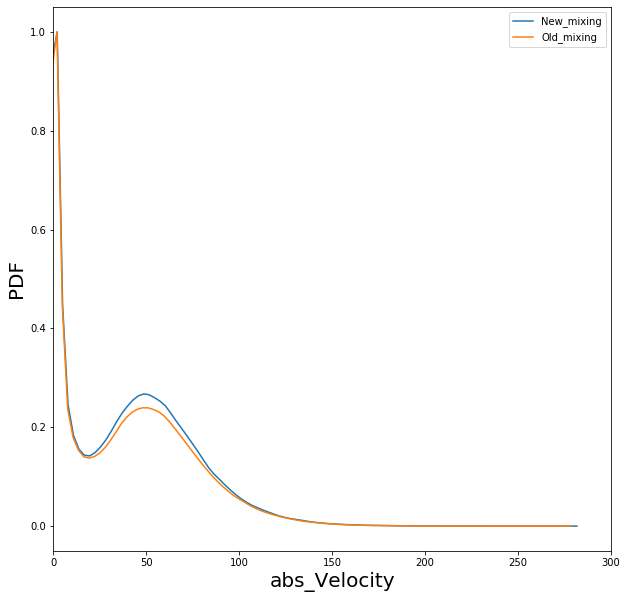

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from lib.Plotting_tricks import seaborn_plot_normalise

moving_window = [2,5,10]
bins = 10
for i in moving_window:
    plt.clf()
    tmp_new = np.concatenate(vel_new, axis=0)
    vel_new_list = np.convolve(tmp_new, np.ones((i,))/i, mode='valid')
    ax1 = sns.distplot(vel_new_list,hist=False, label = 'new_mixing', norm_hist=False,bins=bins)


    tmp_old = np.concatenate(vel_old, axis=0)
    vel_old_list = np.convolve(tmp_old, np.ones((i,))/i, mode='valid')
    ax2 = sns.distplot(vel_old_list,hist=False, label = 'old_mixing', norm_hist=False,bins = bins)
 
    # Trick here is both histogram is in one plot so ax1 and ax2 is same. 
    # So for the data of second plot use index_subplot value, which should be the same
    # with the sequence of loading that data
    
    xd1, yd1 = seaborn_plot_normalise(ax1, norm_xy='Y')
    xd2, yd2 = seaborn_plot_normalise(ax2, norm_xy='Y', index_subplot=1)
    
    plt.clf()
    plt.figure(figsize=(10,10))
    plt.plot(xd1, yd1, label = 'New_mixing');
    plt.plot(xd2, yd2, label = 'Old_mixing');
    plt.xlim(0,300)
    plt.xlabel('abs_Velocity', fontsize=20)
    plt.ylabel('PDF', fontsize=20)
    plt.legend()
    
    
    plt.savefig('PDF_absVel_moving_average_'+str(i))